### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

### Because the image file format is still in gif, then first I will change the file format to jpg in the following way:

In [2]:
gif = cv2.VideoCapture('lena_color.gif')
ret, frame = gif.read()
cv2.imwrite('lena_color.jpg', frame)

True

### After that, I use Test if the image can be read and shown after convert the format

In [3]:
img = cv2.imread("lena_color.jpg")

### Converts from one colour space to the other

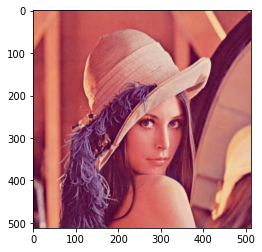

In [4]:
img2 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

### Reading the original image and Generating the histogram of the original image and the cumulative distribution function of the original image

In [5]:
# Reading the original image, here 0 implies that image is read as grayscale
image = cv2.imread('lena_color.jpg', 0)
# Generating the histogram of the original image
hist,bins = np.histogram(image.flatten(),256,[0,256])
# Generating the cumulative distribution function of the original image
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

### Applying Histogram Equalization

In [6]:
# Applying Histogram Equalization on the original image
image_equalized = cv2.equalizeHist(image)

# Generating the histogram of the equalized image
hist_equalized,bins_equalized = np.histogram(image_equalized.flatten(),256,[0,256])

# Generating the cumulative distribution function of the original image
cdf_equalized = hist_equalized.cumsum()
cdf_equalized_normalized = cdf_equalized * hist_equalized.max()/ cdf_equalized.max()

### Plotting Histogram

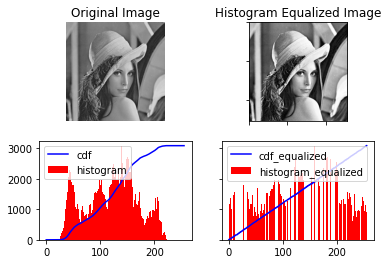

In [7]:
#Plotting the Original and Histogram Equalized Image, Histogram and CDF
fig, axs = plt.subplots(2, 2)

axs[0, 0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 0].set_title('Original Image')

axs[0, 1].imshow(cv2.cvtColor(image_equalized, cv2.COLOR_BGR2RGB))
axs[0, 0].axis('off')
axs[0, 1].set_title('Histogram Equalized Image')


axs[1, 0].plot(cdf_normalized, color = 'b')
axs[1, 0].hist(image.flatten(),256,[0,256], color = 'r')
axs[1, 0].legend(('cdf','histogram'), loc = 'upper left')



axs[1, 1].plot(cdf_equalized_normalized, color = 'b')
axs[1, 1].hist(image_equalized.flatten(),256,[0,256], color = 'r')
axs[1, 1].legend(('cdf_equalized','histogram_equalized'), loc = 'upper left')


# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()